<a href="https://colab.research.google.com/github/opsifiz/AIB5_Mental-Health-Sentiment-Analysis/blob/main/baseline/baseline_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!gdown https://drive.google.com/uc?id=1aH8KYfnN3l16dLpPpMJgJh3Q0OiaEufo

Downloading...
From: https://drive.google.com/uc?id=1aH8KYfnN3l16dLpPpMJgJh3Q0OiaEufo
To: /content/train_dataset.csv
100% 87.2M/87.2M [00:00<00:00, 133MB/s]


In [3]:
df = pd.read_csv('train_dataset.csv',index_col=False)
df

,text,status,from,translated
0,oh my gosh,Anxiety,df1,โอ้พระเจ้า!
1,trouble sleeping confused mind restless heart ...,Anxiety,df1,นอนไม่หลับ วุ่นวายใจ กระวนกระวายใจ ทุกอย่างดูผ...
2,all wrong back off dear forward doubt stay in ...,Anxiety,df1,ทุกอย่างไม่ถูกต้อง ถอยไปเถอะ อย่าก้าวไปข้างหน้...
3,i have shifted my focus to something else but ...,Anxiety,df1,ฉันพยายามเบนความสนใจไปเรื่องอื่นแล้ว แต่ก็ยังก...
4,i am restless and restless it is been a month ...,Anxiety,df1,ฉันกระวนกระวายใจมาก มันเป็นแบบนี้มาเป็นเดือนแล...
...,...,...,...,...
104995,low testosterone after discontinuing rispredon...,schizophrenia,df3,-
104996,how did you finally accept your diagnosis i am...,schizophrenia,df3,-
104997,constantly feel like i am in a competition wit...,schizophrenia,df3,-
104998,has anyone switched over to an entirely differ...,schizophrenia,df3,-


In [4]:
#Create Temporay Dataset where each status have 100 texts.
temp = df
temp = temp.groupby('status').head(100)
temp = temp.drop(columns=['from','translated'])
temp

,text,status
0,oh my gosh,Anxiety
1,trouble sleeping confused mind restless heart ...,Anxiety
2,all wrong back off dear forward doubt stay in ...,Anxiety
3,i have shifted my focus to something else but ...,Anxiety
4,i am restless and restless it is been a month ...,Anxiety
...,...,...
39841,hey you all so a few years back i was supposed...,schizophrenia
39920,my friend is too busy dealing with her own men...,schizophrenia
39991,i feel like everything i have gone through in ...,schizophrenia
40007,lately i have had this strange feeling like a ...,schizophrenia


# Baseline #1

In [5]:
temp['status'].value_counts().index

Index(['Anxiety', 'Normal', 'depression', 'bipolar', 'BPD', 'schizophrenia',
       'mentalillness'],
      dtype='object', name='status')

In [6]:
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, pipeline
from datasets import Dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
dataset = Dataset.from_pandas(temp)

classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli', device=0)
candidate_labels = ['Anxiety', 'Normal', 'depression', 'bipolar', 'BPD', 'schizophrenia', 'mentalillness']

def classify(batch):
    results = classifier(batch['text'], candidate_labels=candidate_labels)
    return {'status_label': [r['labels'][0] for r in results]}

dataset = dataset.map(classify, batched=True, batch_size=32)

temp = dataset.to_pandas()

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(temp['status'], temp['status_label']))

<Figure size 800x600 with 0 Axes>

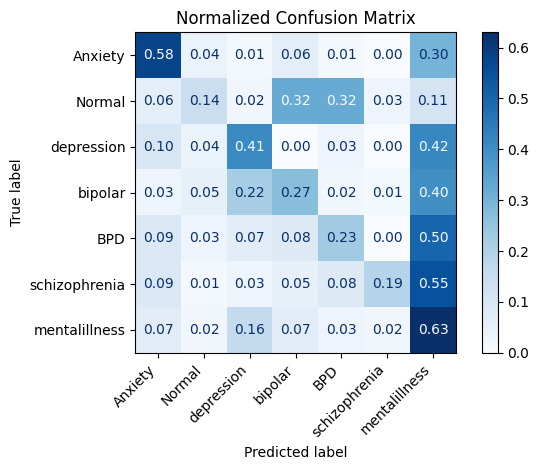

In [10]:
# Compute normalized confusion matrix
cm = confusion_matrix(temp['status'], temp['status_label'], labels=candidate_labels, normalize='true')

# Display normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=candidate_labels)

plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format=".2f")
plt.xticks(rotation=45, ha='right')
plt.title("Normalized Confusion Matrix")
plt.tight_layout()
plt.show()